In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', 200)

In [3]:
applicationData = pd.read_csv('application_data.csv')

In [4]:
previousApplication = pd.read_csv('previous_application.csv')

In [5]:
print(applicationData.size)

37516342


In [6]:
print(applicationData.shape)

(307511, 122)


### Analysing Data Types

In [7]:
applicationData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                   

In [8]:
objectTypeColumns = list(applicationData.select_dtypes(['object']).columns)
print(len(objectTypeColumns))

16


#### 16 columns have dypes as object. Lets observe the kind of data

In [9]:
for column in objectTypeColumns:
    print(column)
    print(applicationData[column].value_counts())
    print('*'*100)

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
****************************************************************************************************
CODE_GENDER
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
****************************************************************************************************
FLAG_OWN_CAR
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
****************************************************************************************************
FLAG_OWN_REALTY
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
****************************************************************************************************
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
********************

Following columns contain string/ text data
- NAME_CONTRACT_TYPE
- NAME_TYPE_SUITE
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS
- NAME_HOUSING_TYPE
- OCCUPATION_TYPE
- ORGANIZATION_TYPE
- FONDKAPREMONT_MODE
- HOUSETYPE_MODE
- WALLSMATERIAL_MODE

Following can be considered for converting to int and map to 0 and 1 for analysis

- CODE_GENDER 
- FLAG_OWN_CAR
- FLAG_OWN_REALTY
- WEEKDAY_APPR_PROCESS_START
- EMERGENCYSTATE_MODE

As observed, following columns have incorrect data types:</font>
- CNT_FAM_MEMBERS (Float) should be int64
- DEF_30_CNT_SOCIAL_CIRCLE (Float) should be int64
- DAYS_LAST_PHONE_CHANGE (Float) should be int64
- AMT_REQ_CREDIT_BUREAU_HOUR (Float) should be int64
- AMT_REQ_CREDIT_BUREAU_WEEK (Float) should be int64

### Fixing to correct data type of columns

In [10]:
#Fixing the data type for CNT_FAM_MEMBERS, DEF_30_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE,
#AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_WEEK
applicationData.CNT_FAM_MEMBERS = applicationData.CNT_FAM_MEMBERS.astype('Int64')
applicationData.DEF_30_CNT_SOCIAL_CIRCLE = applicationData.DEF_30_CNT_SOCIAL_CIRCLE.astype('Int64')
applicationData.DAYS_LAST_PHONE_CHANGE = applicationData.DAYS_LAST_PHONE_CHANGE.astype('Int64')
applicationData.AMT_REQ_CREDIT_BUREAU_HOUR = applicationData.AMT_REQ_CREDIT_BUREAU_HOUR.astype('Int64')
applicationData.AMT_REQ_CREDIT_BUREAU_WEEK = applicationData.AMT_REQ_CREDIT_BUREAU_WEEK.astype('Int64')

## Handling Null values

In [11]:
def getColumnWiseNulls():
    colWiseNulls = round(100*(applicationData.isnull().sum()/len(applicationData.index)), 2)
    colWiseNulls.sort_values(ascending=False, inplace=True)
    return colWiseNulls

In [12]:
def plotColumnWiseNulls(lowerRange=0, upperRange=100):
    res = getColumnWiseNulls()
    plt.figure(figsize=(20,4))
    res[(res>=lowerRange)&(res<=upperRange)].plot.bar()
    

## Drop columns with more that 50 % null values

In [13]:
def RemoveNullColumns(dataFrame, percent= 0.5):
    df = dataFrame.copy()
    ishape = df.shape
    colWiseNulls = df.isnull().sum()/len(df.index)
    colNames = list(colWiseNulls[colWiseNulls.values>=percent].index)
    df.drop(labels=colNames, inplace=True , axis=1)
    
    return df

In [14]:
getColumnWiseNulls()

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

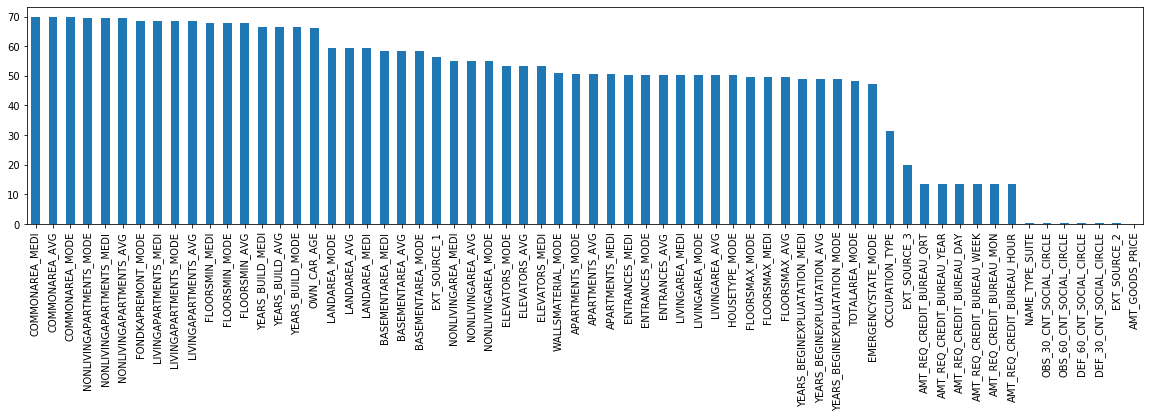

In [15]:
plotColumnWiseNulls(0.01)

In [16]:
applicationData = RemoveNullColumns(applicationData)

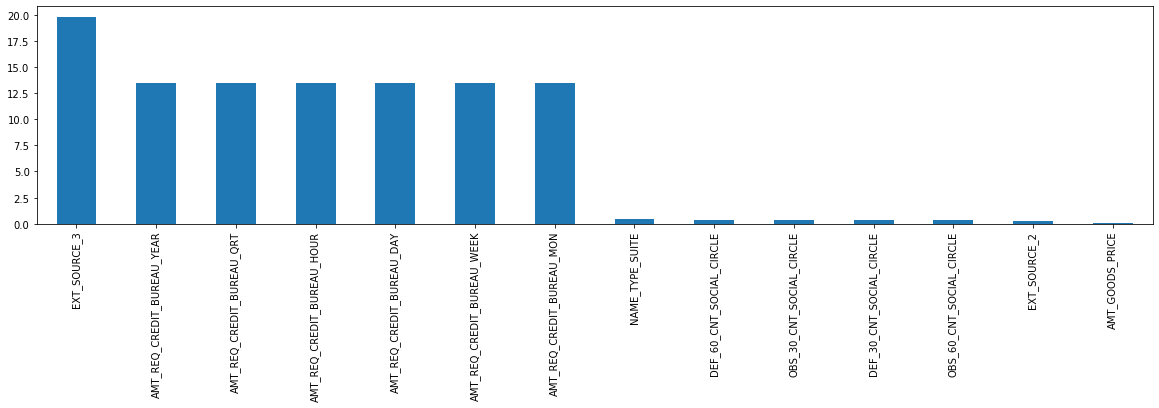

In [17]:
plotColumnWiseNulls(0.01, 30) ##only plot columns with null values between 10% and 30%

In [18]:
## lets examine gender column for nulls
## As it was mentioned during session XNA is not null
applicationData['CODE_GENDER'].value_counts(normalize=True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

#### only four values are not male or female in gender column. We can impute it with mode

In [19]:
mode=applicationData['CODE_GENDER'].mode().values[0]

In [20]:
applicationData['CODE_GENDER'].replace('XNA', mode, inplace=True)

In [21]:
applicationData['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [22]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_HOUR'].describe())
applicationData['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


0    264366
1      1560
2        56
3         9
4         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

#### Since both median and mode are 0, it is safe to fill nulls with 0. Mean cannot work out here since the number of enquiries cannot be fractional


In [23]:
applicationData.loc[applicationData['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull(),'AMT_REQ_CREDIT_BUREAU_HOUR']=0

In [24]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_HOUR'].describe())
applicationData['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

count    307511.000000
mean          0.005538
std           0.078014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


0    305885
1      1560
2        56
3         9
4         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

### For imputing columns AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK , AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR following logic is being used.
- we have computed a metric (median/mode) for each column. Specific selection of metric is mentioned near the code for selection
- after that we select max of the queries made during a smaller time period or the metric selected in above step. 
 For example - for AMT_REQ_CREDIT_BUREAU_WEEK, we have computed the median value, but if there are any queries made during last day and if that number is more than median, we choose that number as those queries are part of the week. 

In [25]:
# generic function to impute based on above logic
import math
def fillNaForCreditInquries(row,currentColumn, previousColumn, altValue):
    if math.isnan(row[currentColumn]):
        res = max(row[previousColumn], altValue)
    else:
        res=  row[currentColumn]
    return res

#### AMT_REQ_CREDIT_BUREAU_DAY


In [26]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_DAY'].describe())

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


In [27]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())

41519


In [28]:
applicationData['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

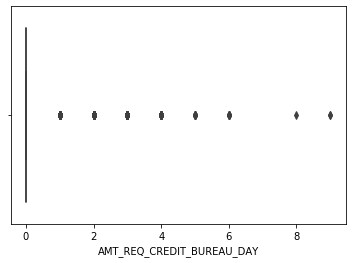

In [29]:
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_DAY', data=applicationData)

In [30]:
# For imputation we use daily data. If hourly review is available and greater than 0 we use that else we impute with median/mode(both are 0)
applicationData['AMT_REQ_CREDIT_BUREAU_DAY'] = applicationData.apply(fillNaForCreditInquries, axis=1, args=('AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 0))

In [31]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())


0


In [32]:
applicationData['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    306022
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

#### AMT_REQ_CREDIT_BUREAU_WEEK


In [33]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'].describe())

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


In [34]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum())

41519


In [35]:
applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)*100

0    96.790881
1     3.085807
2     0.074814
3     0.021805
4     0.012782
6     0.007519
5     0.003760
8     0.001880
7     0.000752
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

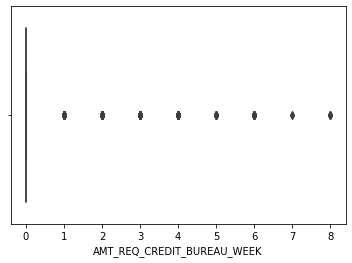

In [36]:
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_WEEK', data=applicationData)

In [37]:
# For imputation we use weekly data. If daily review is available and greater than 0 we use that else we impute with median/mode
applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'] = applicationData.apply(fillNaForCreditInquries, axis=1, args=('AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY', 0))

In [38]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum())


0


In [39]:
applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()


0.0    298975
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

#### AMT_REQ_CREDIT_BUREAU_MON


In [40]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_MON'].describe())

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


In [41]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum())

41519


In [42]:
applicationData['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

#### values greater than  11 can be considered outliers as the number of values are considerably low

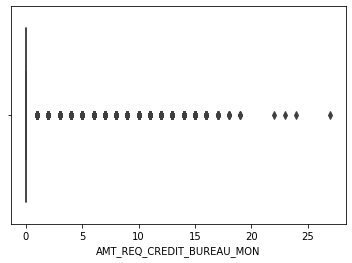

In [43]:
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_MON', data=applicationData)

In [44]:
# For imputation we use monthly data. If weekly is available and greater than 0 we use that else we impute with median/mode
applicationData['AMT_REQ_CREDIT_BUREAU_MON'] = applicationData.apply(fillNaForCreditInquries, axis=1, args=('AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK', 0))

In [45]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_MON'].describe())
print(applicationData['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum())
applicationData['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()


count    307511.000000
mean          0.231293
std           0.856810
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
0


0.0     263752
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

#### AMT_REQ_CREDIT_BUREAU_QRT


In [46]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_QRT'].describe())


count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


In [47]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum())

41519


In [48]:
applicationData['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

####  Values of 19, 261 is a clear outlier. Also there is only 1 record each with such values hence we can consider deleting or capping it later

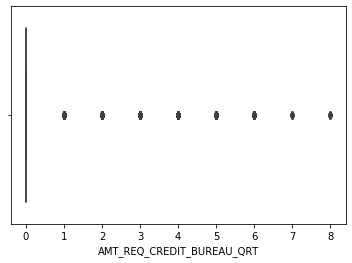

In [49]:
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_QRT', data=applicationData[applicationData['AMT_REQ_CREDIT_BUREAU_QRT']<19])

In [50]:
# For imputation we use quarterly data. If monthly review is available and greater than 0 we use that else we impute with median/mode
applicationData['AMT_REQ_CREDIT_BUREAU_QRT'] = applicationData.apply(fillNaForCreditInquries, axis=1, args=('AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON', 0))

In [51]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_QRT'].describe())
print(applicationData['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum())
applicationData['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()


count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64
0


0.0      256936
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

#### AMT_REQ_CREDIT_BUREAU_YEAR


In [52]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_YEAR'].describe())

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


In [53]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum())


41519


In [54]:
applicationData['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()


0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

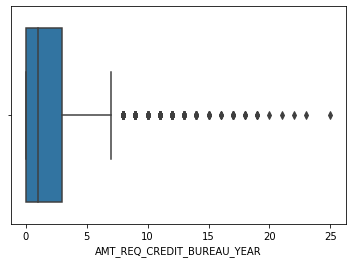

In [55]:
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_YEAR', data=applicationData)

####  Values >15 have significantly lower number of values. and may be treated as outliers

In [56]:
temp = applicationData.loc[applicationData['AMT_REQ_CREDIT_BUREAU_YEAR']<10, 'AMT_REQ_CREDIT_BUREAU_YEAR']
temp.describe()

count    265851.000000
mean          1.894121
std           1.851201
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

#### If we remove the outliers i.e applications with >= 10 inquiries , mean and median, mode still tend to 1. So we can substitute the value by 1

In [57]:
applicationData['AMT_REQ_CREDIT_BUREAU_YEAR'] = applicationData.apply(fillNaForCreditInquries, axis=1, args=('AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT', 1))

In [58]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_YEAR'].describe())
print(applicationData['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum())
applicationData['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()


count    307511.000000
mean          1.778463
std           1.765523
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64
0


1.0     104924
0.0      71801
2.0      50192
3.0      33628
4.0      20714
5.0      12052
6.0       6967
7.0       3869
8.0       2127
9.0       1096
11.0        31
12.0        30
10.0        22
13.0        19
14.0        10
17.0         7
15.0         6
19.0         4
18.0         4
16.0         3
21.0         1
23.0         1
25.0         1
20.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

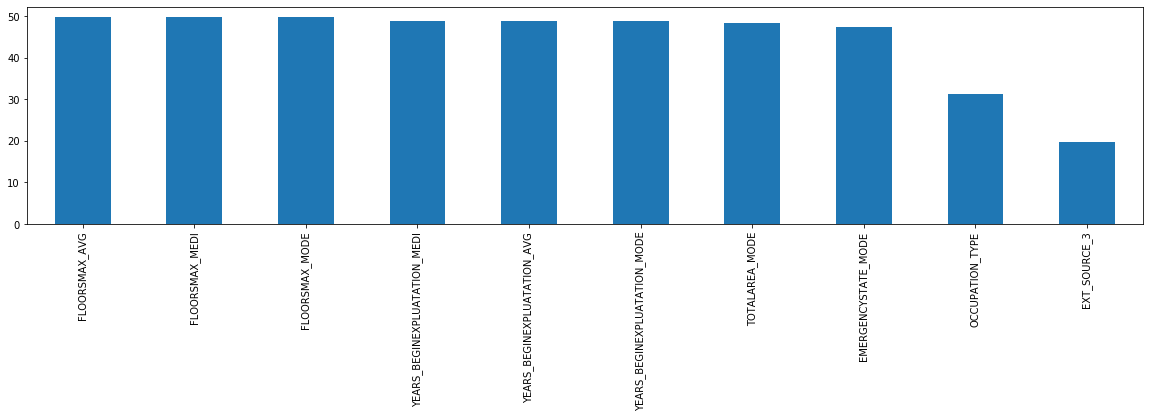

In [59]:
# inspect null values
plotColumnWiseNulls(1)

## Subset Dataframe 
#### Subsetting the Application_Data dataframe to get relevant 30 columns as per ourunderstanding for further analysis.

    Selected the following columns:
    1. SK_ID_CURR
    2. TARGET
    3. NAME_CONTRACT_TYPE
    4. CODE_GENDER
    5. FLAG_OWN_REALTY
    6. CNT_CHILDREN
    7. AMT_INCOME_TOTAL
    8. AMT_CREDIT
    9. AMT_ANNUITY
    10. NAME_INCOME_TYPE
    11. NAME_EDUCATION_TYPE
    12. NAME_FAMILY_STATUS
    13. REGION_POPULATION_RELATIVE
    14. DAYS_BIRTH
    15. DAYS_EMPLOYED
    16. FLAG_MOBIL
    17. FLAG_CONT_MOBILE
    18. OCCUPATION_TYPE
    19. CNT_FAM_MEMBERS
    20. REGION_RATING_CLIENT_W_CITY
    21. WEEKDAY_APPR_PROCESS_START
    22. REG_REGION_NOT_LIVE_REGION
    23. ORGANIZATION_TYPE
    24. EXT_SOURCE_2
    25. DEF_30_CNT_SOCIAL_CIRCLE
    26. DAYS_LAST_PHONE_CHANGE
    27. FLAG_DOCUMENT_2
    28. FLAG_DOCUMENT_3
    29. AMT_REQ_CREDIT_BUREAU_HOUR
    30. AMT_REQ_CREDIT_BUREAU_WEEK

In [60]:
#Subsetting the Application_Data dataframe toget the required columns
Required_Columns = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
                   'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE',
                   'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
                   'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
                   'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
                   'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
                   'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK']

applicationDataRevised = applicationData[Required_Columns]

In [61]:
applicationDataRevised.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,...,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK
0,100002,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,Working,...,WEDNESDAY,0,Business Entity Type 3,0.262949,2,-1134,0,1,0,0.0
1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,State servant,...,MONDAY,0,School,0.622246,0,-828,0,1,0,0.0
2,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,Working,...,MONDAY,0,Government,0.555912,0,-815,0,0,0,0.0
3,100006,0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,Working,...,WEDNESDAY,0,Business Entity Type 3,0.650442,0,-617,0,1,0,0.0
4,100007,0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,Working,...,THURSDAY,0,Religion,0.322738,0,-1106,0,0,0,0.0


# Creating Bins 

### Lets observe AMT_INCOME_TOTAL column

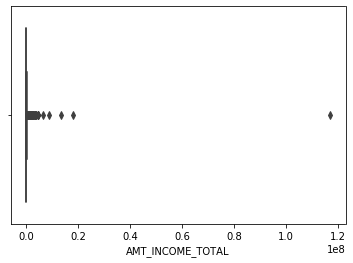

In [62]:
sns.boxplot(applicationDataRevised['AMT_INCOME_TOTAL'])


In [63]:
applicationDataRevised['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [64]:
applicationDataRevised['AMT_INCOME_TOTAL'].quantile([0,.1,.2,.25,.5,.75,.9,.95,.99,1])

0.00        25650.0
0.10        81000.0
0.20        99000.0
0.25       112500.0
0.50       147150.0
0.75       202500.0
0.90       270000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

### Observation
There is an incremental increase in income ranges. There are some indiviuals with high incomes but those are around 0.1% . Around 20% have income less than 1,00,000. 50% have income less than 1,50,000 75% population has income less than 2,00,000. Similarly there can be division on basis of 50000 income difference. 

In [65]:
cut_bins = [0,50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 1000000, 1050000]
cut_labels = [ '<=50k', '50k-1 lac', '1 lac-1.5 lac', '1.5 lac-2 lac','2lac-2.5lac', '2.5lac-3lac', '3lac-3.5lac', '3.5lac-4lac', '4lac-4.5lac', '4.5lac-5lac', '5lac-10lac', '>10lac']
applicationDataRevised['income_bins'] = pd.cut(applicationDataRevised['AMT_INCOME_TOTAL'].clip(upper=1000001), bins=cut_bins,include_lowest =True, labels=cut_labels)
res = applicationDataRevised[['income_bins', 'AMT_INCOME_TOTAL']]

In [66]:
applicationDataRevised['income_bins'].value_counts()

1 lac-1.5 lac    91591
1.5 lac-2 lac    64307
50k-1 lac        59181
2lac-2.5lac      48137
2.5lac-3lac      17039
3lac-3.5lac       8874
3.5lac-4lac       5802
4lac-4.5lac       4924
<=50k             4517
5lac-10lac        2452
4.5lac-5lac        437
>10lac             250
Name: income_bins, dtype: int64

In [67]:
res[res['AMT_INCOME_TOTAL']>1000000].sort_values(by='AMT_INCOME_TOTAL', ascending=False)

,income_bins,AMT_INCOME_TOTAL
12840,>10lac,117000000.0
203693,>10lac,18000090.0
246858,>10lac,13500000.0
77768,>10lac,9000000.0
131127,>10lac,6750000.0
...,...,...
7061,>10lac,1035000.0
215170,>10lac,1035000.0
58760,>10lac,1012500.0
264932,>10lac,1009368.0


In [68]:
res[res['AMT_INCOME_TOTAL']<50000].sort_values(by='AMT_INCOME_TOTAL', ascending=False)

,income_bins,AMT_INCOME_TOTAL
222891,<=50k,49950.0
141762,<=50k,49950.0
113823,<=50k,49783.5
145280,<=50k,49716.0
109583,<=50k,49549.5
...,...,...
246104,<=50k,26100.0
186643,<=50k,26100.0
240137,<=50k,26100.0
20727,<=50k,25650.0


In [69]:
res[(res['AMT_INCOME_TOTAL']>=200000) &(res['AMT_INCOME_TOTAL']<=250000) ].sort_values(by='AMT_INCOME_TOTAL', ascending=False)

,income_bins,AMT_INCOME_TOTAL
281449,2lac-2.5lac,249750.0
15016,2lac-2.5lac,249750.0
299527,2lac-2.5lac,249750.0
133616,2lac-2.5lac,249750.0
144459,2lac-2.5lac,249750.0
...,...,...
274557,2lac-2.5lac,200250.0
278654,2lac-2.5lac,200250.0
55765,2lac-2.5lac,200250.0
233635,2lac-2.5lac,200250.0


### Lets observe DAYS_BIRTH column

In [73]:
applicationDataRevised['DAYS_BIRTH'].value_counts() # = -applicationDataRevised['DAYS_BIRTH'] 

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-25032     1
-7956      1
-8001      1
-7861      1
-24894     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64